In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
df = pd.read_excel('C:/Users/ykkou/Desktop/imarticus/Tutorial Datasets/metabolic_syndrome multinomial dataset.xlsx')

In [249]:
df

codesub  age  hpt        smoking dmdx  height  weight  waist    hip  \
0     R-S615112   70  yes   never smoked   no    1.54    40.0   76.0   61.0   
1     MAA615089   20   no  still smoking   no    1.74    54.6   83.0   62.0   
2     M-M616372   29   no   never smoked   no    1.54    37.0   83.0   63.0   
3     MFM615361   25   no  still smoking   no    1.60    48.4   83.5   64.0   
4     R-A615780   37   no   never smoked   no    1.44    44.5   85.0   64.0   
...         ...  ...  ...            ...  ...     ...     ...    ...    ...   
4335  MFI625589   38   no  still smoking   no    1.61   147.5  146.0  150.0   
4336       ASU1   58   no   never smoked   no    1.83   187.8  154.5  153.5   
4337   SAA 6152   49   no   never smoked   no    1.63   141.7  133.0  160.0   
4338  V-M315296   64   no   never smoked  yes    1.45    69.0    NaN    NaN   
4339    31-5827   51   no  still smoking  yes    1.63    87.0    NaN    NaN   

      msbpr  ...  hba1c    fbs  mogtt1h  mogtt2h  totchol  ftrigliz   hdl  \
0     135.0  ...    5.2   3.99     7.06     3.22     5.43      1.06  1.65   
1     105.0  ...    5.3   4.26     8.63     6.49     5.13      1.17  1.59   
2      91.0  ...    4.8   4.94     6.26     5.15     5.55      0.72  2.24   
3     117.0  ...    4.8   4.60     4.31     3.85     4.01      1.12  1.21   
4     102.0  ...    5.1   4.60     9.49     7.71     5.21      0.78  1.43   
...     ...  ...    ...    ...      ...      ...      ...       ...   ...   
4335  115.0  ...    7.9   9.32    17.61    14.16     7.00      2.60  1.04   
4336  161.0  ...    5.3   4.93     6.16     6.04     3.69      1.06  1.62   
4337  180.0  ...    6.0   5.07     6.64     3.42     6.10      1.03  1.18   
4338  159.0  ...    9.5  13.07      NaN      NaN     5.51      1.26  1.11   
4339  164.5  ...   10.2   5.14      NaN      NaN     8.10      1.81  1.17   

       ldl  gender crural  
0     2.69  female  rural  
1     2.79    male  rural  
2     2.55  female  rural  
3     1.83    male  rural  
4     2.40  female  rural  
...    ...     ...    ...  
4335  4.53    male  urban  
4336  3.00    male  urban  
4337  4.24  female  rural  
4338  4.25  female  rural  
4339  2.54    male  rural  

[4340 rows x 21 columns]

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   codesub   4340 non-null   object 
 1   age       4340 non-null   int64  
 2   hpt       4340 non-null   object 
 3   smoking   4340 non-null   object 
 4   dmdx      4340 non-null   object 
 5   height    4339 non-null   float64
 6   weight    4338 non-null   float64
 7   waist     4338 non-null   float64
 8   hip       4338 non-null   float64
 9   msbpr     4340 non-null   float64
 10  mdbpr     4340 non-null   float64
 11  hba1c     4270 non-null   float64
 12  fbs       4092 non-null   float64
 13  mogtt1h   3736 non-null   float64
 14  mogtt2h   3732 non-null   float64
 15  totchol   4286 non-null   float64
 16  ftrigliz  4287 non-null   float64
 17  hdl       4288 non-null   float64
 18  ldl       4287 non-null   float64
 19  gender    4340 non-null   object 
 20  crural    4340 non-null   obje

In [160]:
df.isnull().sum()

codesub       0
age           0
hpt           0
smoking       0
dmdx          0
height        1
weight        2
waist         2
hip           2
msbpr         0
mdbpr         0
hba1c        70
fbs         248
mogtt1h     604
mogtt2h     608
totchol      54
ftrigliz     53
hdl          52
ldl          53
gender        0
crural        0
dtype: int64

In [161]:
df.nunique()

codesub     4340
age           71
hpt            2
smoking        3
dmdx           2
height        60
weight       765
waist        338
hip          304
msbpr        284
mdbpr        155
hba1c        106
fbs          835
mogtt1h     1272
mogtt2h     1142
totchol      630
ftrigliz     460
hdl          225
ldl          572
gender         2
crural         2
dtype: int64

In [162]:
numcols = df.select_dtypes(include = np.number)

In [163]:
objcols = df.select_dtypes(include=['object'])

In [164]:
numcols

age  height  weight  waist    hip  msbpr  mdbpr  hba1c    fbs  mogtt1h  \
0      70    1.54    40.0   76.0   61.0  135.0   80.0    5.2   3.99     7.06   
1      20    1.74    54.6   83.0   62.0  105.0   58.0    5.3   4.26     8.63   
2      29    1.54    37.0   83.0   63.0   91.0   60.0    4.8   4.94     6.26   
3      25    1.60    48.4   83.5   64.0  117.0   68.5    4.8   4.60     4.31   
4      37    1.44    44.5   85.0   64.0  102.0   78.0    5.1   4.60     9.49   
...   ...     ...     ...    ...    ...    ...    ...    ...    ...      ...   
4335   38    1.61   147.5  146.0  150.0  115.0   81.0    7.9   9.32    17.61   
4336   58    1.83   187.8  154.5  153.5  161.0   88.0    5.3   4.93     6.16   
4337   49    1.63   141.7  133.0  160.0  180.0   88.5    6.0   5.07     6.64   
4338   64    1.45    69.0    NaN    NaN  159.0   81.5    9.5  13.07      NaN   
4339   51    1.63    87.0    NaN    NaN  164.5   82.0   10.2   5.14      NaN   

      mogtt2h  totchol  ftrigliz   hdl   ldl  
0        3.22     5.43      1.06  1.65  2.69  
1        6.49     5.13      1.17  1.59  2.79  
2        5.15     5.55      0.72  2.24  2.55  
3        3.85     4.01      1.12  1.21  1.83  
4        7.71     5.21      0.78  1.43  2.40  
...       ...      ...       ...   ...   ...  
4335    14.16     7.00      2.60  1.04  4.53  
4336     6.04     3.69      1.06  1.62  3.00  
4337     3.42     6.10      1.03  1.18  4.24  
4338      NaN     5.51      1.26  1.11  4.25  
4339      NaN     8.10      1.81  1.17  2.54  

[4340 rows x 15 columns]

In [165]:
objcols

codesub  hpt        smoking dmdx  gender crural
0     R-S615112  yes   never smoked   no  female  rural
1     MAA615089   no  still smoking   no    male  rural
2     M-M616372   no   never smoked   no  female  rural
3     MFM615361   no  still smoking   no    male  rural
4     R-A615780   no   never smoked   no  female  rural
...         ...  ...            ...  ...     ...    ...
4335  MFI625589   no  still smoking   no    male  urban
4336       ASU1   no   never smoked   no    male  urban
4337   SAA 6152   no   never smoked   no  female  rural
4338  V-M315296   no   never smoked  yes  female  rural
4339    31-5827   no  still smoking  yes    male  rural

[4340 rows x 6 columns]

In [166]:
objcols.isnull().sum()

codesub    0
hpt        0
smoking    0
dmdx       0
gender     0
crural     0
dtype: int64

In [167]:
objcols.nunique()

codesub    4340
hpt           2
smoking       3
dmdx          2
gender        2
crural        2
dtype: int64

In [168]:
df.hpt.value_counts()

no     3836
yes     504
Name: hpt, dtype: int64

In [169]:
df.smoking.value_counts()

never smoked       3307
still smoking       698
quitted smoking     335
Name: smoking, dtype: int64

In [170]:
df.dmdx.value_counts()

no     3870
yes     470
Name: dmdx, dtype: int64

In [171]:
df.gender.value_counts()

female    2817
male      1523
Name: gender, dtype: int64

In [172]:
df.crural.value_counts()

urban    2218
rural    2122
Name: crural, dtype: int64

In [173]:
numcols.columns

Index(['age', 'height', 'weight', 'waist', 'hip', 'msbpr', 'mdbpr', 'hba1c',
       'fbs', 'mogtt1h', 'mogtt2h', 'totchol', 'ftrigliz', 'hdl', 'ldl'],
      dtype='object')

In [174]:
numcols.describe()

age       height       weight        waist          hip  \
count  4340.000000  4339.000000  4338.000000  4338.000000  4338.000000   
mean     47.841244     1.567534    63.751814    86.323642    97.883806   
std      14.514511     0.085950    14.170264    12.942197    10.583373   
min      18.000000     1.270000    30.000000    50.800000    61.000000   
25%      38.000000     1.510000    53.800000    77.000000    91.000000   
50%      48.000000     1.560000    62.000000    86.000000    97.000000   
75%      58.000000     1.630000    71.975000    95.000000   104.000000   
max      89.000000     1.960000   187.800000   154.500000   160.000000   

             msbpr        mdbpr        hba1c          fbs     mogtt1h  \
count  4340.000000  4340.000000  4270.000000  4092.000000  3736.00000   
mean    133.537002    78.467108     5.805199     5.733876     9.10625   
std      23.429004    12.053125     1.448404     2.551954     3.85036   
min      68.500000    41.500000     0.200000     2.500000     0.16000   
25%     117.000000    70.000000     5.100000     4.480000     6.54000   
50%     130.000000    77.500000     5.400000     5.180000     8.59000   
75%     146.500000    86.000000     5.800000     6.020000    10.84000   
max     237.000000   128.500000    15.000000    28.010000    41.50000   

           mogtt2h      totchol     ftrigliz          hdl          ldl  
count  3732.000000  4286.000000  4287.000000  4288.000000  4287.000000  
mean      7.343365     5.791594     1.533944     1.345406     3.549153  
std       3.716139     1.279834     1.052120     0.360008     1.122977  
min       0.160000     0.180000     0.110000     0.080000     0.140000  
25%       5.150000     4.970000     0.930000     1.110000     2.790000  
50%       6.600000     5.700000     1.260000     1.320000     3.460000  
75%       8.410000     6.530000     1.770000     1.540000     4.245000  
max      37.370000    23.140000    12.660000     4.430000    10.560000

In [175]:
numcols.height = numcols.height.fillna(numcols.height.mean())

In [176]:
numcols.weight = numcols.weight.fillna(numcols.weight.mean())

In [177]:
numcols.waist = numcols.waist.fillna(numcols.waist.mean())

In [178]:
numcols.hip = numcols.hip.fillna(numcols.hip.mean())

In [179]:
numcols.hba1c = numcols.hba1c.fillna(numcols.hba1c.mean())

In [180]:
numcols.describe()

age       height       weight        waist          hip  \
count  4340.000000  4340.000000  4340.000000  4340.000000  4340.000000   
mean     47.841244     1.567534    63.751814    86.323642    97.883806   
std      14.514511     0.085940    14.166998    12.939214    10.580933   
min      18.000000     1.270000    30.000000    50.800000    61.000000   
25%      38.000000     1.510000    53.800000    77.000000    91.000000   
50%      48.000000     1.560000    62.000000    86.000000    97.000000   
75%      58.000000     1.630000    71.925000    95.000000   104.000000   
max      89.000000     1.960000   187.800000   154.500000   160.000000   

             msbpr        mdbpr        hba1c          fbs     mogtt1h  \
count  4340.000000  4340.000000  4340.000000  4092.000000  3736.00000   
mean    133.537002    78.467108     5.805199     5.733876     9.10625   
std      23.429004    12.053125     1.436673     2.551954     3.85036   
min      68.500000    41.500000     0.200000     2.500000     0.16000   
25%     117.000000    70.000000     5.100000     4.480000     6.54000   
50%     130.000000    77.500000     5.400000     5.180000     8.59000   
75%     146.500000    86.000000     5.800000     6.020000    10.84000   
max     237.000000   128.500000    15.000000    28.010000    41.50000   

           mogtt2h      totchol     ftrigliz          hdl          ldl  
count  3732.000000  4286.000000  4287.000000  4288.000000  4287.000000  
mean      7.343365     5.791594     1.533944     1.345406     3.549153  
std       3.716139     1.279834     1.052120     0.360008     1.122977  
min       0.160000     0.180000     0.110000     0.080000     0.140000  
25%       5.150000     4.970000     0.930000     1.110000     2.790000  
50%       6.600000     5.700000     1.260000     1.320000     3.460000  
75%       8.410000     6.530000     1.770000     1.540000     4.245000  
max      37.370000    23.140000    12.660000     4.430000    10.560000

In [325]:
numcols.fbs = numcols.fbs.fillna(numcols.fbs.mean())

In [182]:
numcols.describe()

age       height       weight        waist          hip  \
count  4340.000000  4340.000000  4340.000000  4340.000000  4340.000000   
mean     47.841244     1.567534    63.751814    86.323642    97.883806   
std      14.514511     0.085940    14.166998    12.939214    10.580933   
min      18.000000     1.270000    30.000000    50.800000    61.000000   
25%      38.000000     1.510000    53.800000    77.000000    91.000000   
50%      48.000000     1.560000    62.000000    86.000000    97.000000   
75%      58.000000     1.630000    71.925000    95.000000   104.000000   
max      89.000000     1.960000   187.800000   154.500000   160.000000   

             msbpr        mdbpr        hba1c          fbs     mogtt1h  \
count  4340.000000  4340.000000  4340.000000  4340.000000  3736.00000   
mean    133.537002    78.467108     5.805199     5.702226     9.10625   
std      23.429004    12.053125     1.436673     2.481285     3.85036   
min      68.500000    41.500000     0.200000     2.500000     0.16000   
25%     117.000000    70.000000     5.100000     4.540000     6.54000   
50%     130.000000    77.500000     5.400000     5.180000     8.59000   
75%     146.500000    86.000000     5.800000     5.950000    10.84000   
max     237.000000   128.500000    15.000000    28.010000    41.50000   

           mogtt2h      totchol     ftrigliz          hdl          ldl  
count  3732.000000  4286.000000  4287.000000  4288.000000  4287.000000  
mean      7.343365     5.791594     1.533944     1.345406     3.549153  
std       3.716139     1.279834     1.052120     0.360008     1.122977  
min       0.160000     0.180000     0.110000     0.080000     0.140000  
25%       5.150000     4.970000     0.930000     1.110000     2.790000  
50%       6.600000     5.700000     1.260000     1.320000     3.460000  
75%       8.410000     6.530000     1.770000     1.540000     4.245000  
max      37.370000    23.140000    12.660000     4.430000    10.560000

In [183]:
numcols.mogtt1h = numcols.mogtt1h.fillna(numcols.mogtt1h.mean())

In [184]:
numcols.mogtt2h = numcols.mogtt2h.fillna(numcols.mogtt2h.median())

In [185]:
numcols.totchol = numcols.totchol.fillna(numcols.totchol.mean())

In [186]:
numcols.ftrigliz = numcols.ftrigliz.fillna(numcols.ftrigliz.median())

In [187]:
numcols.hdl = numcols.hdl.fillna(numcols.hdl.mean())

In [188]:
numcols.ldl = numcols.ldl.fillna(numcols.ldl.mean())

In [189]:
num_ind_var = numcols

In [190]:
num_ind_var = num_ind_var.drop('hba1c',axis=1)

In [191]:
num_ind_var

age  height  weight       waist         hip  msbpr  mdbpr    fbs  \
0      70    1.54    40.0   76.000000   61.000000  135.0   80.0   3.99   
1      20    1.74    54.6   83.000000   62.000000  105.0   58.0   4.26   
2      29    1.54    37.0   83.000000   63.000000   91.0   60.0   4.94   
3      25    1.60    48.4   83.500000   64.000000  117.0   68.5   4.60   
4      37    1.44    44.5   85.000000   64.000000  102.0   78.0   4.60   
...   ...     ...     ...         ...         ...    ...    ...    ...   
4335   38    1.61   147.5  146.000000  150.000000  115.0   81.0   9.32   
4336   58    1.83   187.8  154.500000  153.500000  161.0   88.0   4.93   
4337   49    1.63   141.7  133.000000  160.000000  180.0   88.5   5.07   
4338   64    1.45    69.0   86.323642   97.883806  159.0   81.5  13.07   
4339   51    1.63    87.0   86.323642   97.883806  164.5   82.0   5.14   

       mogtt1h  mogtt2h  totchol  ftrigliz   hdl   ldl  
0      7.06000     3.22     5.43      1.06  1.65  2.69  
1      8.63000     6.49     5.13      1.17  1.59  2.79  
2      6.26000     5.15     5.55      0.72  2.24  2.55  
3      4.31000     3.85     4.01      1.12  1.21  1.83  
4      9.49000     7.71     5.21      0.78  1.43  2.40  
...        ...      ...      ...       ...   ...   ...  
4335  17.61000    14.16     7.00      2.60  1.04  4.53  
4336   6.16000     6.04     3.69      1.06  1.62  3.00  
4337   6.64000     3.42     6.10      1.03  1.18  4.24  
4338   9.10625     6.60     5.51      1.26  1.11  4.25  
4339   9.10625     6.60     8.10      1.81  1.17  2.54  

[4340 rows x 14 columns]

In [91]:
import seaborn as sns

<AxesSubplot:>

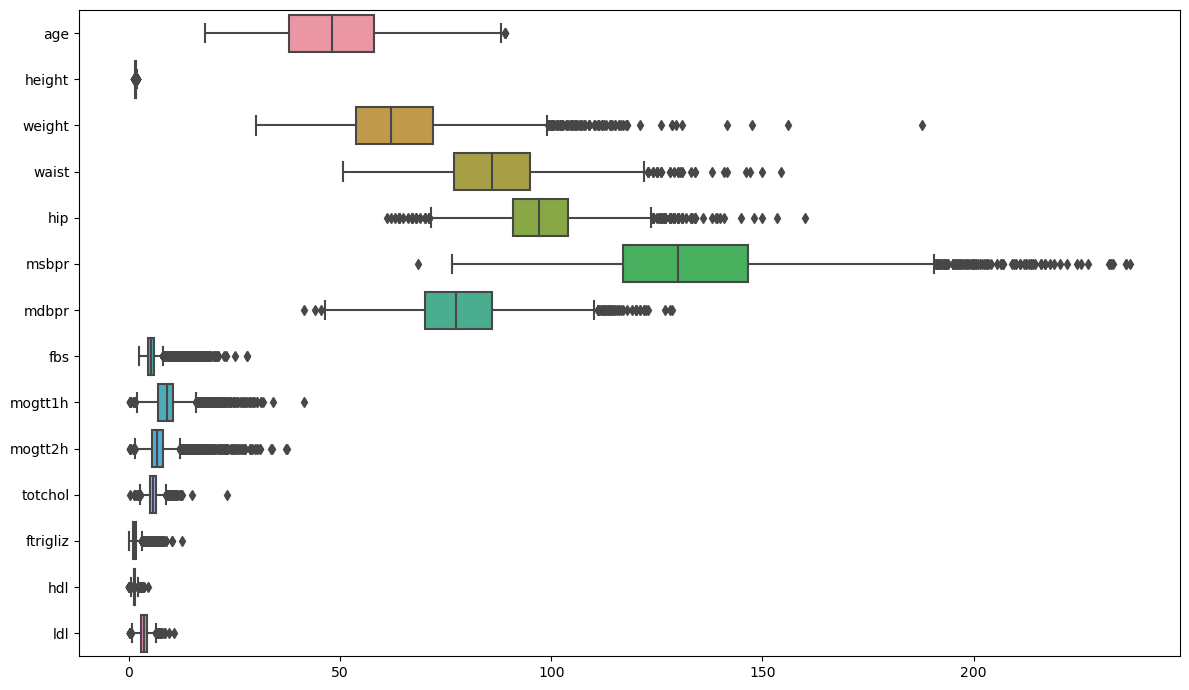

In [192]:
sns.boxplot(data=num_ind_var,orient='h')

In [194]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [195]:
standardScaler = StandardScaler()

In [199]:
scaled_array = standardScaler.fit_transform(num_ind_var)

In [200]:
standardscaled_numcols_ind  = pd.DataFrame(scaled_array,columns=num_ind_var.columns)

<AxesSubplot:>

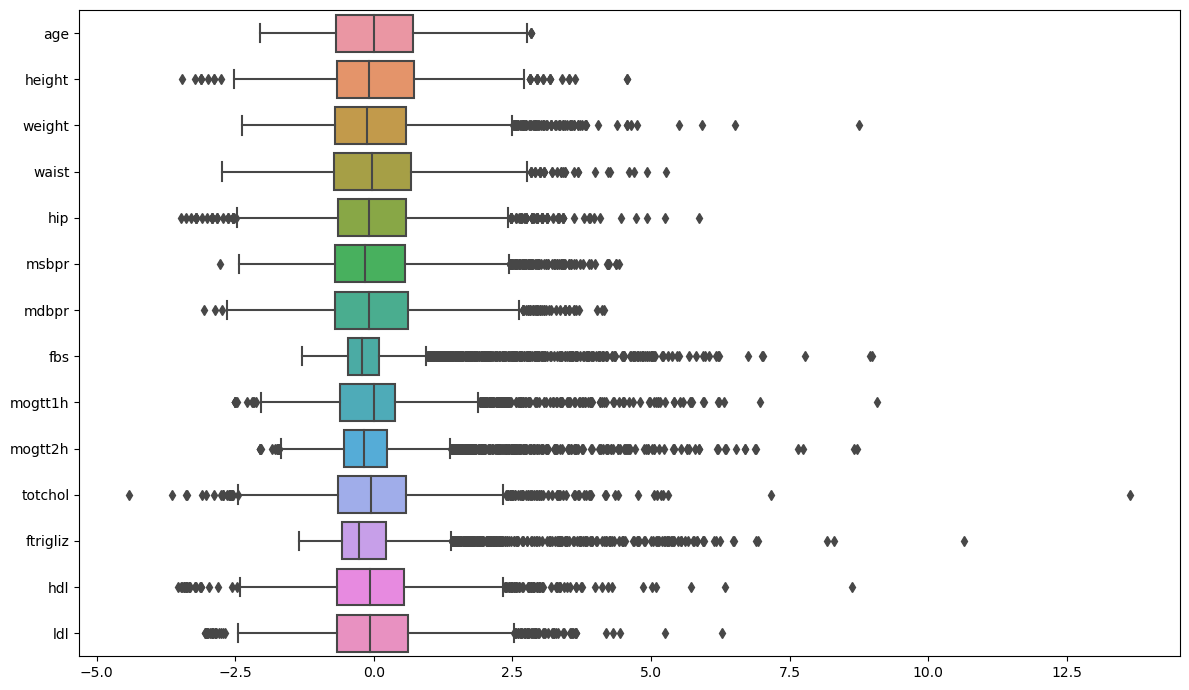

In [201]:
sns.boxplot(data = standardscaled_numcols_ind,orient='h')

In [213]:
normalScaler = MinMaxScaler()

In [214]:
scaled_array = normalScaler.fit_transform(num_ind_var)

In [215]:
normalscaled_numcols_ind = pd.DataFrame(scaled_array, columns=num_ind_var.columns)

<AxesSubplot:>

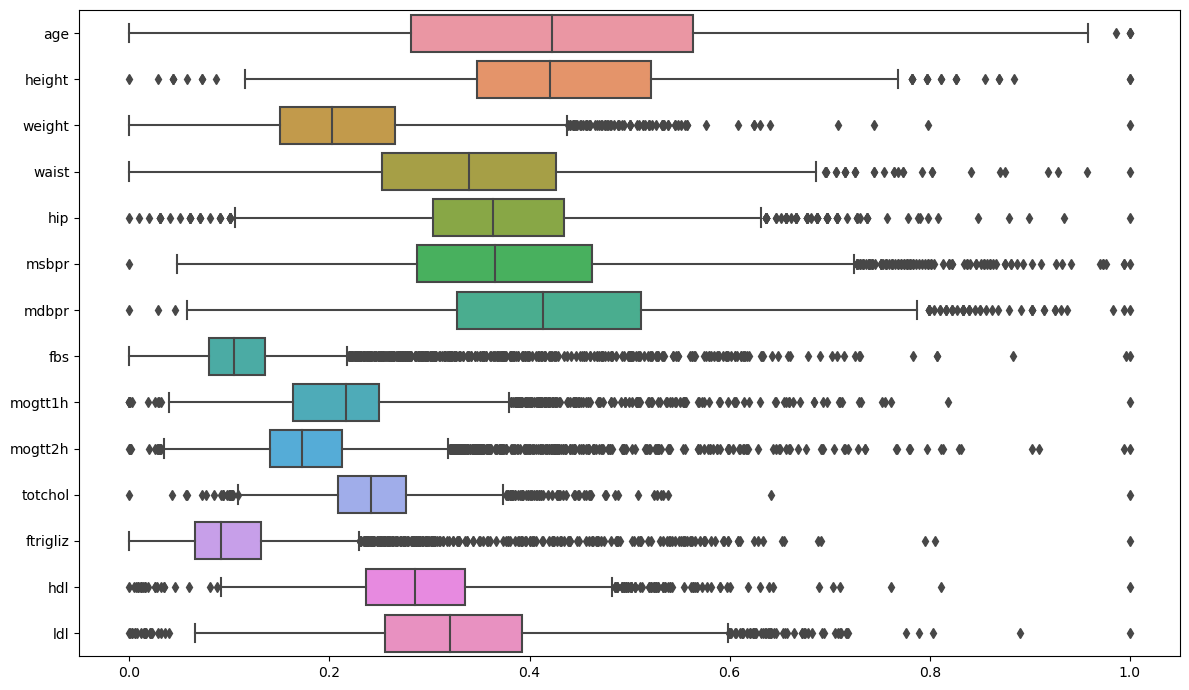

In [216]:
sns.boxplot(data = normalscaled_numcols_ind,orient='h')

In [206]:
robustScaler = RobustScaler()

In [207]:
scaled_array = robustScaler.fit_transform(num_ind_var)

In [208]:
robustscaled_numcols_ind = pd.DataFrame(scaled_array,columns=num_ind_var.columns)

<AxesSubplot:>

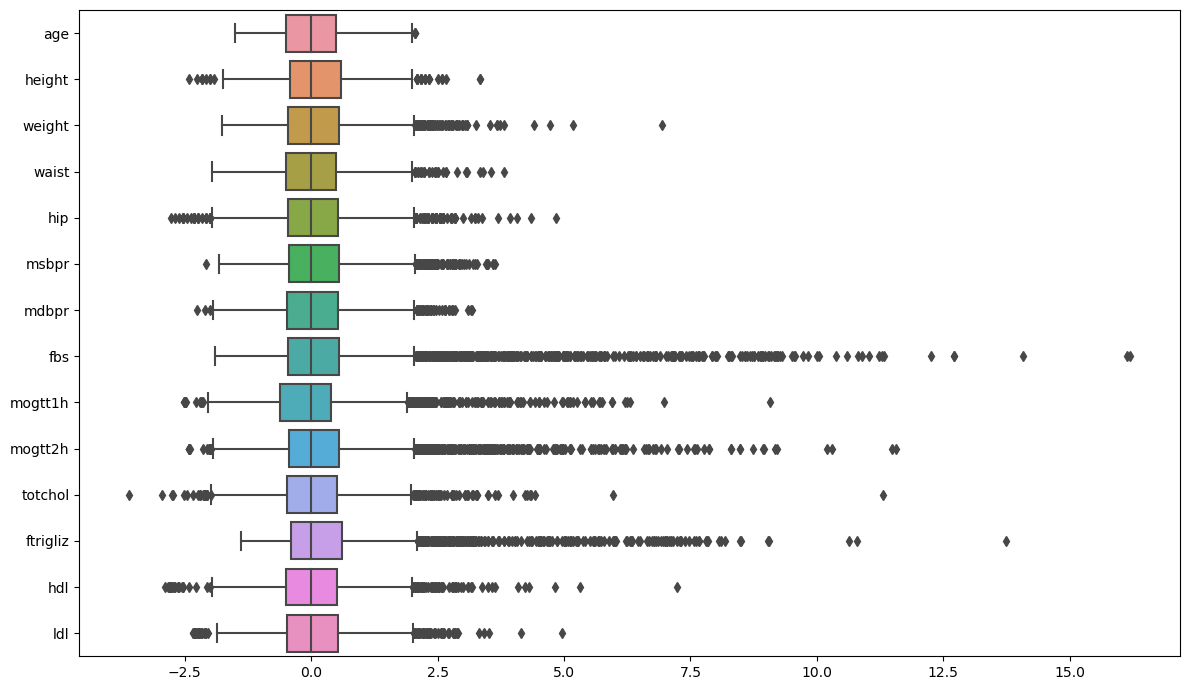

In [209]:
sns.boxplot(data=robustscaled_numcols_ind,orient='h')

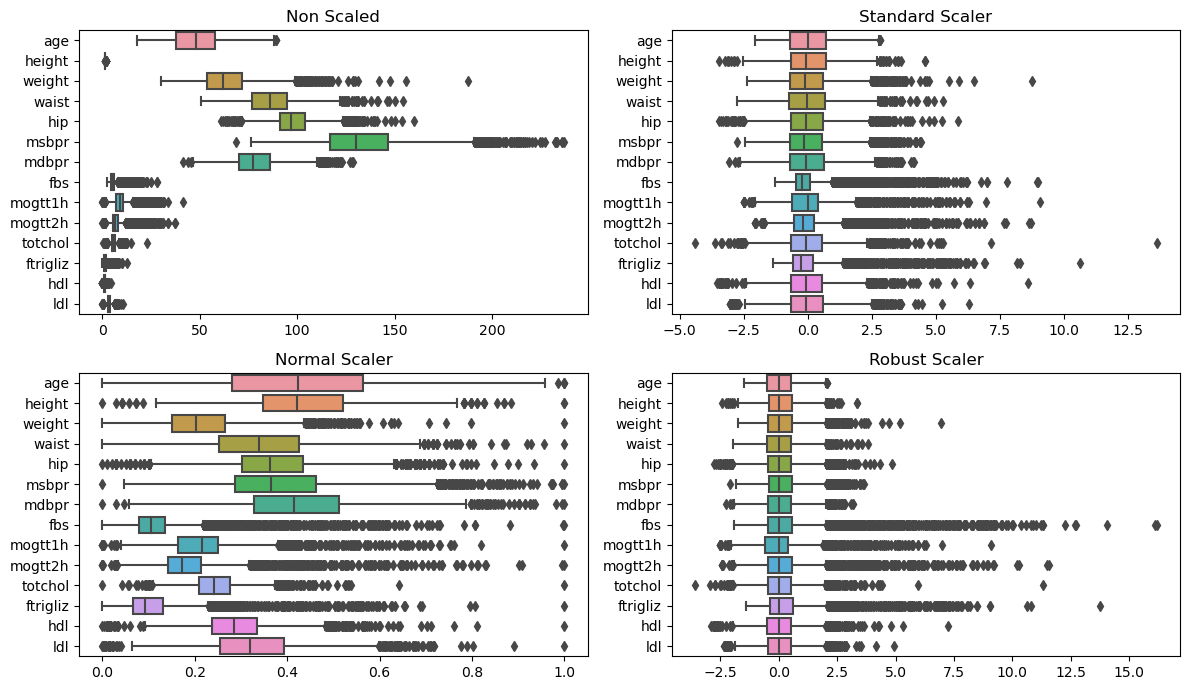

In [210]:
plt.rcParams["figure.figsize"] = [12, 7]
f, axes = plt.subplots(2, 2)
sns.boxplot(data=num_ind_var,orient='h', ax=axes[0,0]).set(title = 'Non Scaled')
sns.boxplot(data = standardscaled_numcols_ind,orient='h', ax=axes[0,1]).set(title = 'Standard Scaler')
sns.boxplot(data = normalscaled_numcols_ind,orient='h', ax=axes[1,0]).set(title = 'Normal Scaler')
sns.boxplot(data=robustscaled_numcols_ind,orient='h', ax=axes[1,1]).set(title = 'Robust Scaler')
plt.show()

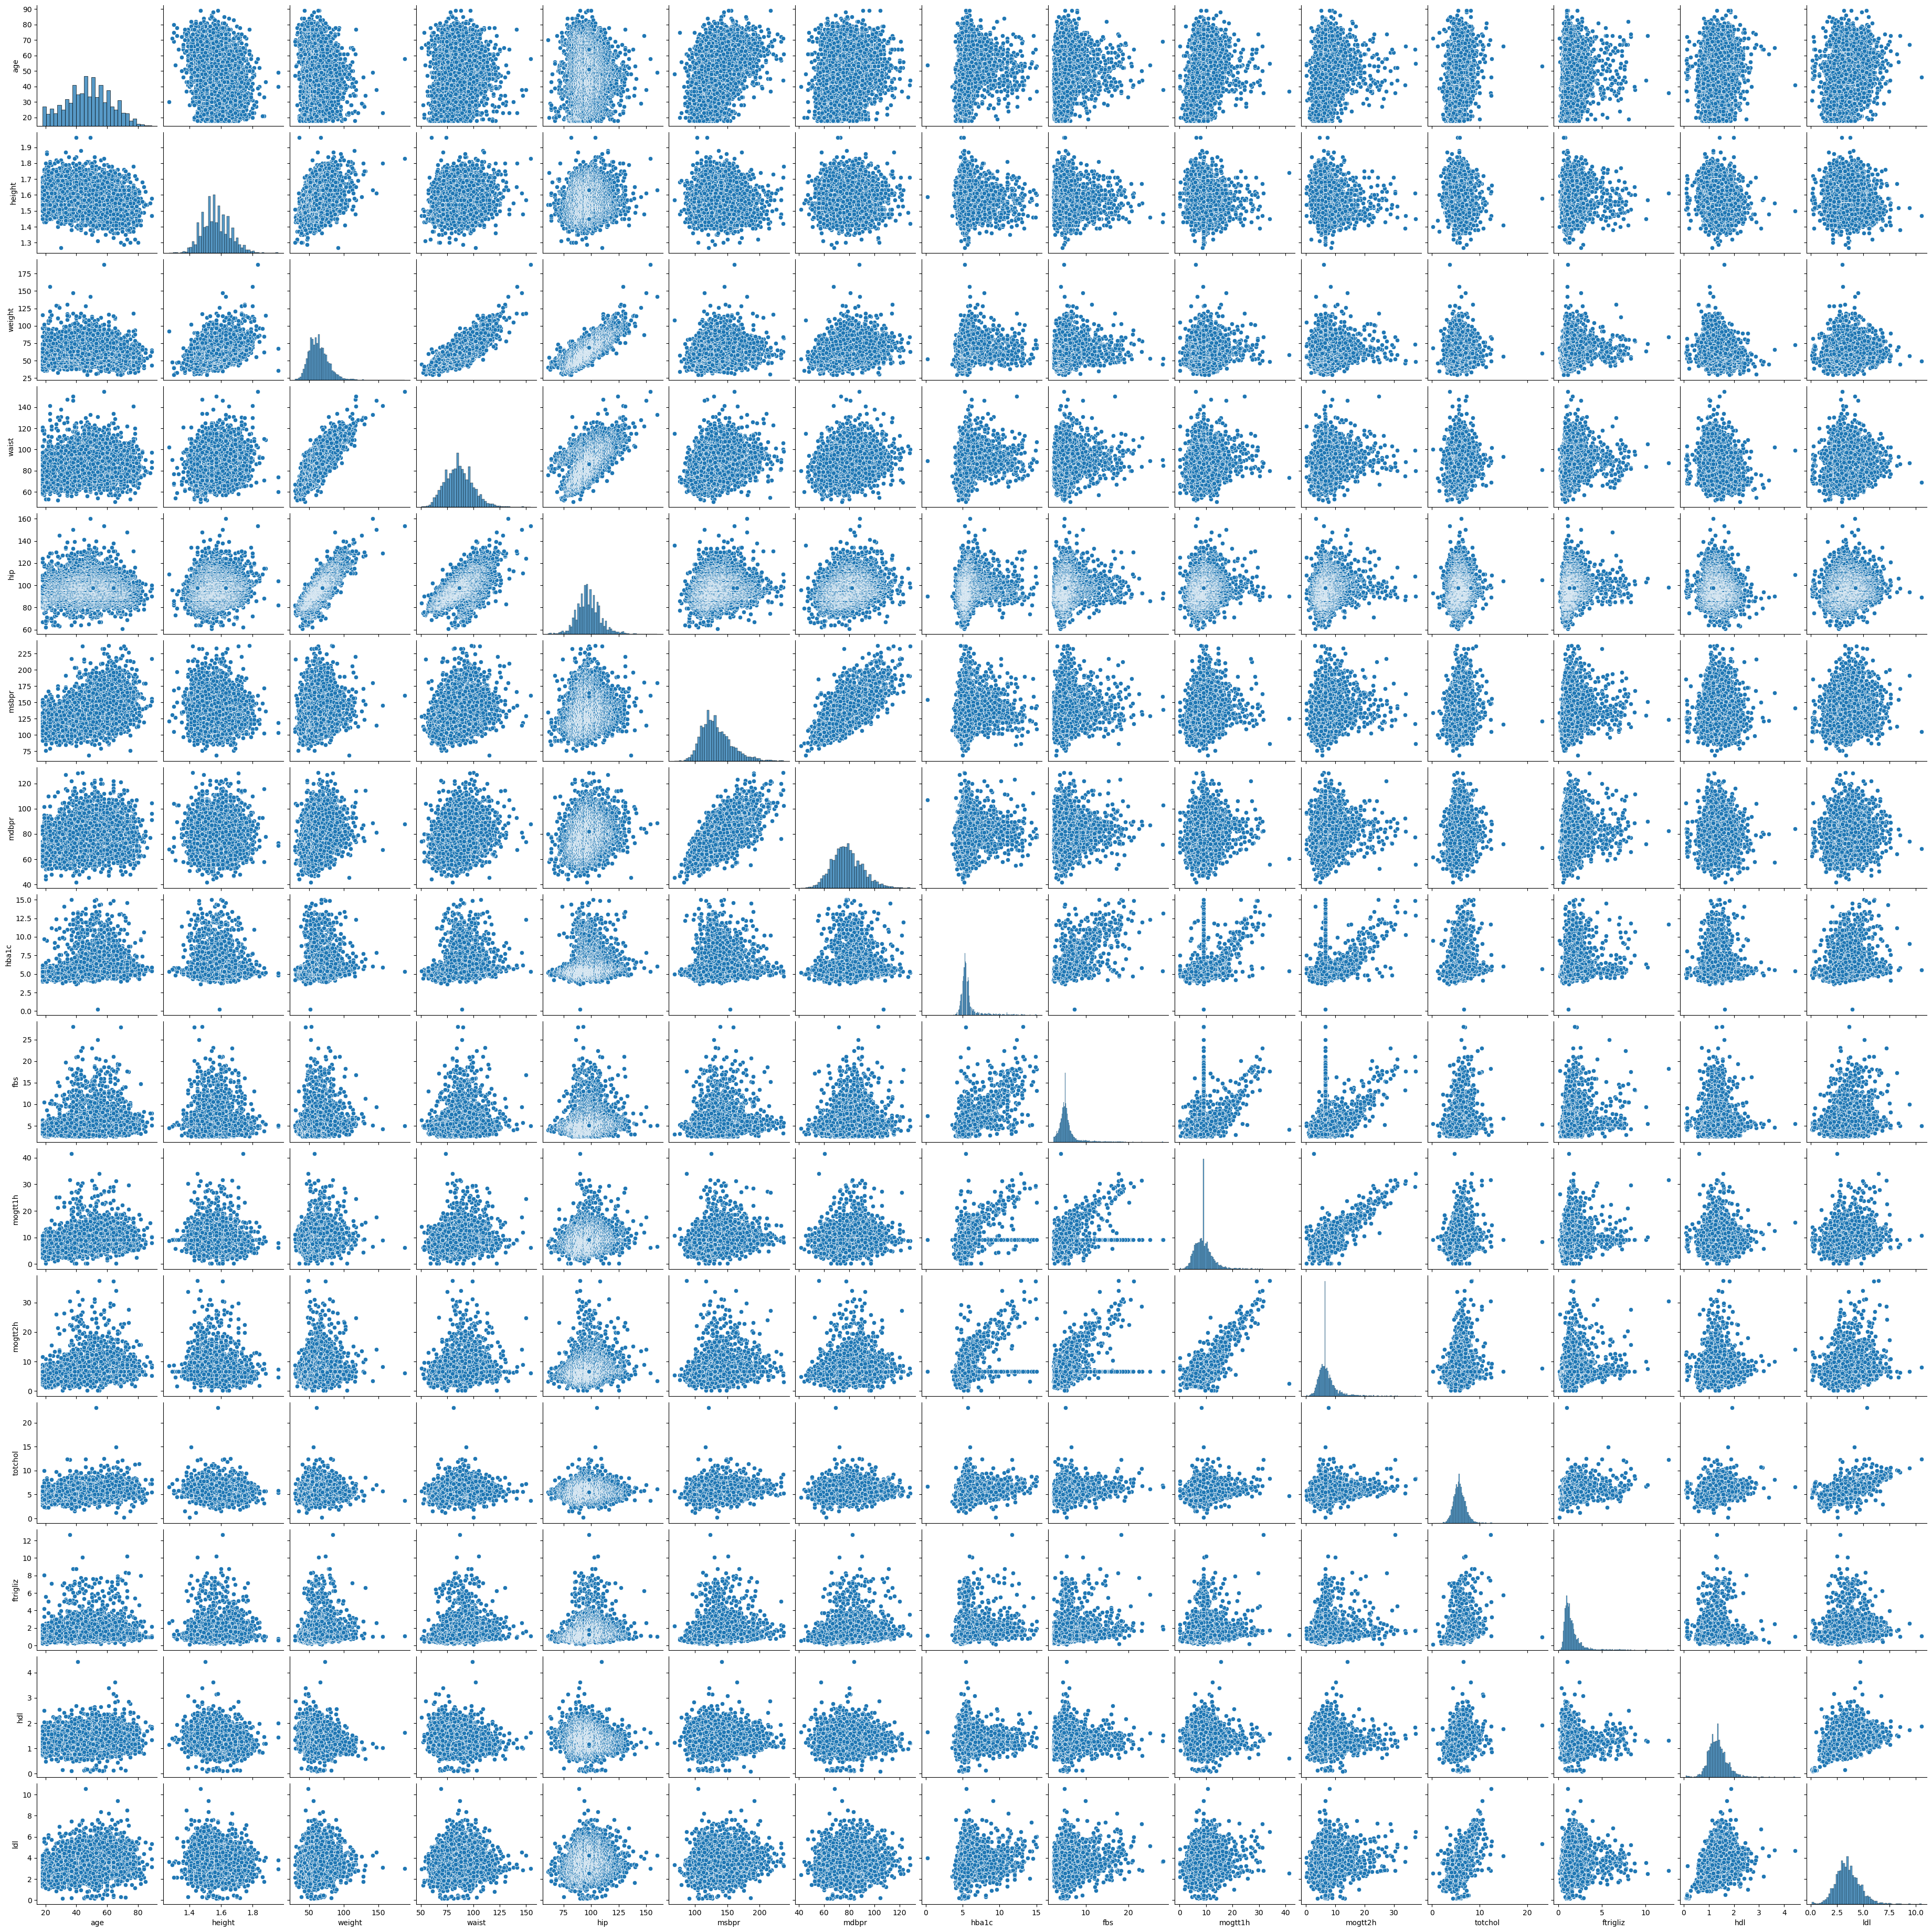

In [211]:
sns.pairplot(data=numcols)

In [220]:
from  matplotlib.colors import LinearSegmentedColormap

<AxesSubplot:>

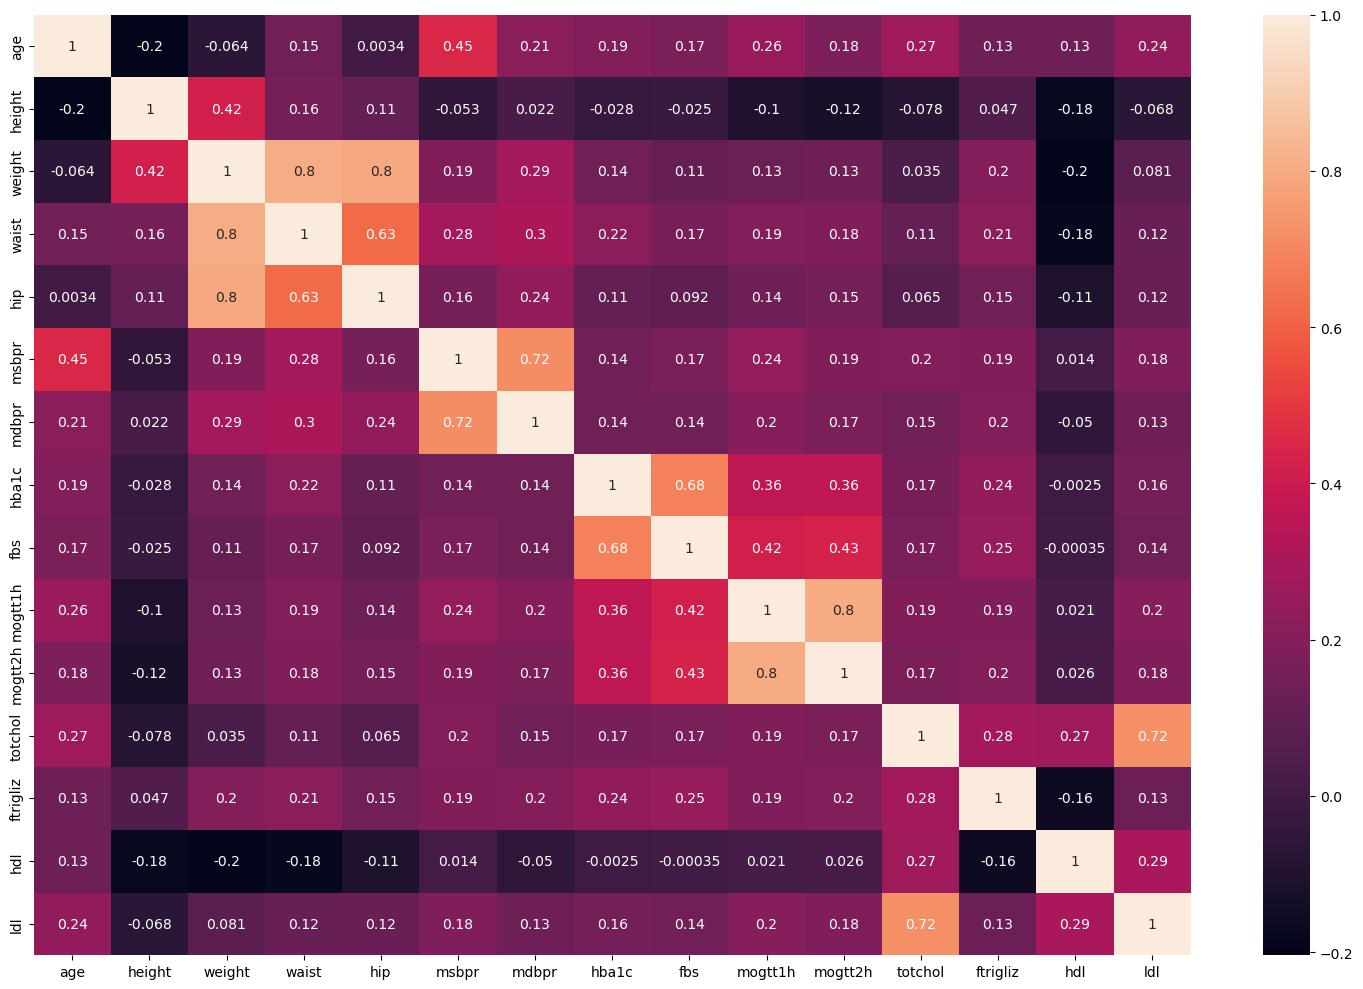

In [222]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=numcols.corr(),annot=True)

Text(5.1, 0.1, 'mode')

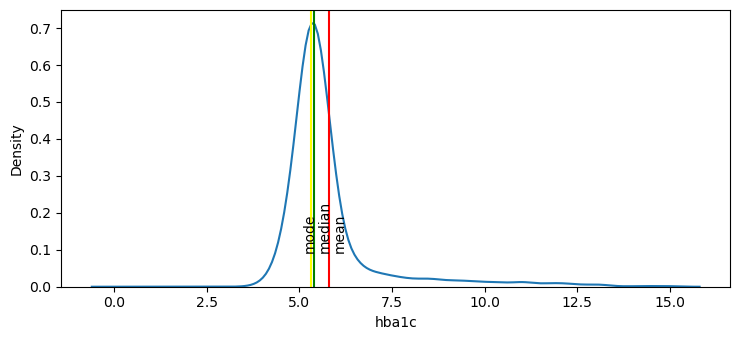

In [324]:
import statistics as stats
sns.kdeplot(numcols.hba1c)
plt.axvline(numcols.hba1c.mean(), c= 'red')
plt.text(numcols.hba1c.mean()+0.1,0.1,'mean',rotation=90)
plt.axvline(numcols.hba1c.median(), c= 'green')
plt.text(numcols.hba1c.median()+0.1,0.1,'median',rotation=90)
plt.axvline(stats.mode(numcols.hba1c), c= 'yellow')
plt.text(stats.mode(numcols.hba1c)-0.2,0.1,'mode',rotation=90)

In [326]:
diab_df = pd.concat([numcols, objcols], axis=1)

In [251]:
# Test Null average hba1c of gender m/f equal
diab_df.hba1c.groupby(diab_df.gender).mean()

gender
female    5.792167
male      5.829304
Name: hba1c, dtype: float64

In [252]:
# different averages. 
diab_df.hba1c.groupby(diab_df.gender).var()

gender
female    2.041100
male      2.106914
Name: hba1c, dtype: float64

In [253]:
# we have to conduct a unequal variance T-test
from scipy.stats import ttest_ind

In [258]:
diab_df_male = diab_df[diab_df.gender=='male']
diab_df_female = diab_df[diab_df.gender=='female']

In [262]:
ttest_ind(diab_df_male.hba1c,diab_df_female.hba1c,equal_var=False)

Ttest_indResult(statistic=0.8088672848061239, pvalue=0.4186540140235876)

In [ ]:
# pvalue > 0.05. Hence we fail to reject Null. Hence there is no significant difference in average male hba1c and female hba1c

In [263]:
# Test Null Average waist of gender male/female equal
diab_df.waist.groupby(diab_df.gender).mean()

gender
female    85.197499
male      88.406601
Name: waist, dtype: float64

In [264]:
# different averages. 
diab_df.waist.groupby(diab_df.gender).var()

gender
female    172.390619
male      151.653808
Name: waist, dtype: float64

In [265]:
# we have to conduct a unequal variance T-test
ttest_ind(diab_df_male.waist,diab_df_female.waist,equal_var=False)

Ttest_indResult(statistic=8.003465357343753, pvalue=1.6606918519162976e-15)

In [ ]:
# pvalue < 0.05. Hence we reject Null. Hence ther is significant difference in average waists of male and female

In [268]:
# Test Null Average totchol of smoking equal
diab_df.totchol.groupby(diab_df.smoking).mean()

smoking
never smoked       5.798079
quitted smoking    5.996363
still smoking      5.662587
Name: totchol, dtype: float64

In [269]:
# we have to conduct an independent anova test
from scipy.stats import f_oneway

In [288]:
diab_df_never = diab_df[diab_df.smoking=='never smoked']
diab_df_quitted = diab_df[diab_df.smoking == 'quitted smoking']
diab_df_still = diab_df[diab_df.smoking=='still smoking']

In [297]:
f_oneway(diab_df_never.totchol,diab_df_quitted.totchol,diab_df_still.totchol)

F_onewayResult(statistic=8.00129644698351, pvalue=0.00033999789535411445)

In [ ]:
# pvalue < 0.05. Hence we reject Null. Hence there is a significant difference in average of totchol of different smoking categories

In [327]:
# Test Null Average fbs of smoking equal
diab_df.fbs.groupby(diab_df.smoking).mean()

smoking
never smoked       5.718969
quitted smoking    5.984896
still smoking      5.487235
Name: fbs, dtype: float64

In [301]:
diab_df_never.describe()

age       height       weight        waist          hip  \
count  3307.000000  3307.000000  3307.000000  3307.000000  3307.000000   
mean     47.849713     1.545663    62.680493    85.927966    98.229765   
std      14.085130     0.077585    13.896593    13.068976    10.811085   
min      18.000000     1.290000    30.000000    50.800000    61.000000   
25%      39.000000     1.490000    53.000000    77.000000    91.000000   
50%      48.000000     1.540000    61.000000    85.000000    98.000000   
75%      58.000000     1.590000    70.500000    94.000000   104.000000   
max      89.000000     1.960000   187.800000   154.500000   160.000000   

             msbpr        mdbpr        hba1c          fbs      mogtt1h  \
count  3307.000000  3307.000000  3307.000000  3307.000000  3307.000000   
mean    133.139559    78.427351     5.823154     5.718969     9.222446   
std      23.549644    11.894824     1.465640     2.520065     3.542223   
min      68.500000    41.500000     3.600000     2.500000     0.160000   
25%     116.500000    70.000000     5.100000     4.540000     7.090000   
50%     129.500000    77.500000     5.400000     5.180000     9.106250   
75%     147.000000    86.000000     5.800000     5.950000    10.540000   
max     237.000000   128.500000    15.000000    28.010000    41.500000   

           mogtt2h      totchol     ftrigliz          hdl          ldl  
count  3307.000000  3307.000000  3307.000000  3307.000000  3307.000000  
mean      7.438007     5.798079     1.478059     1.385076     3.551205  
std       3.445712     1.266903     1.035475     0.363141     1.122570  
min       0.160000     0.180000     0.110000     0.080000     0.140000  
25%       5.630000     4.990000     0.900000     1.145000     2.795000  
50%       6.600000     5.720000     1.230000     1.360000     3.460000  
75%       8.240000     6.510000     1.700000     1.585000     4.230000  
max      37.370000    23.140000    12.660000     4.430000    10.560000

In [328]:
f_oneway(diab_df_never.fbs,diab_df_quitted.fbs,diab_df_still.fbs)

F_onewayResult(statistic=4.8778567817544545, pvalue=0.007655133331164055)

In [276]:
# pvalue < 0.05. Hence Reject Null. There is significant difference in average fbs of different smoking categories

In [278]:
# Test Null No Association between smoking and gender
pd.crosstab(diab_df.smoking,diab_df.gender)

gender           female  male
smoking                      
never smoked       2723   584
quitted smoking      46   289
still smoking        48   650

In [280]:
from scipy.stats import chi2_contingency

In [282]:
chi2_contingency(pd.crosstab(diab_df.smoking,diab_df.gender))

(1858.3862379601344,
 0.0,
 2,
 array([[2146.50207373, 1160.49792627],
        [ 217.44124424,  117.55875576],
        [ 453.05668203,  244.94331797]]))

In [283]:
# reject Null.

In [285]:
# Test Null No Association between smoking and crural
pd.crosstab(diab_df.smoking,diab_df.crural)

crural           rural  urban
smoking                      
never smoked      1613   1694
quitted smoking    140    195
still smoking      369    329

In [287]:
chi2_contingency(pd.crosstab(diab_df.smoking,diab_df.crural))

(11.18805960589122,
 0.0037200067248415523,
 2,
 array([[1616.92488479, 1690.07511521],
        [ 163.79493088,  171.20506912],
        [ 341.28018433,  356.71981567]]))

In [ ]:
# reject Null
